In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

%matplotlib inline

Load the mnist dataset

In [2]:
mnist = fetch_mldata('MNIST original', data_home='\mnist')

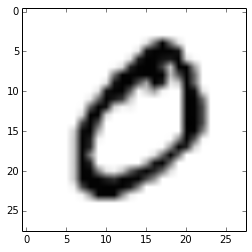

In [3]:
plt.imshow(mnist.data[0].reshape((28,28)), cmap='Greys')

We are goind to round the greyscale images to binary black or white values for each pixel

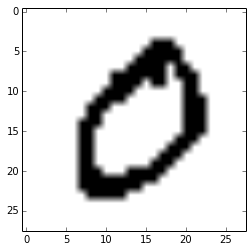

In [4]:
plt.imshow((mnist.data[0]/255.0).round().reshape((28,28)), cmap='Greys')

Next the image is going to be encoded as a document. Each pixel corresponds to a word in our vocabulary. A black pixel is an occurance of that word in a document. Thus to convert a digit picture to a document we simply note which pixels are black.

In [5]:
pic = (mnist.data[0]/255.0).round().nonzero()[0]
count = pic.shape[0]
doc = str(count) + " "
for loc, black_pixel_location in enumerate(pic):
    doc = doc + str(black_pixel_location-1) + ":1"
    if loc != count - 1:
        doc = doc + " "
print doc

125 127:1 128:1 129:1 154:1 155:1 156:1 157:1 158:1 181:1 182:1 183:1 184:1 185:1 186:1 208:1 209:1 210:1 211:1 212:1 214:1 215:1 234:1 235:1 236:1 237:1 238:1 239:1 240:1 242:1 243:1 244:1 262:1 263:1 264:1 265:1 267:1 268:1 271:1 272:1 289:1 290:1 291:1 292:1 299:1 300:1 316:1 317:1 318:1 319:1 327:1 328:1 329:1 343:1 344:1 345:1 355:1 356:1 357:1 371:1 372:1 383:1 384:1 385:1 398:1 399:1 400:1 411:1 412:1 413:1 426:1 427:1 439:1 440:1 441:1 454:1 455:1 466:1 467:1 468:1 482:1 483:1 493:1 494:1 495:1 510:1 511:1 520:1 521:1 522:1 538:1 539:1 547:1 548:1 549:1 566:1 567:1 568:1 572:1 573:1 574:1 575:1 576:1 594:1 595:1 596:1 597:1 598:1 599:1 600:1 601:1 602:1 603:1 622:1 623:1 624:1 625:1 626:1 627:1 628:1 629:1 651:1 652:1 653:1 654:1 655:1


Now that we can convert an digit image into a bag-of-words style document we can create our corpus from all of the images

In [6]:
corpus_path = os.path.join(os.getcwd(), "..", "datasets", "mnist.dat")
fo = open(corpus_path, "w")

doc = "784 "
for i in xrange(784):
    doc = doc + str(i)+":1"
    if(i != 783):
        doc = doc + " "
        
fo.write(doc)

d=0
for image in mnist.data:
    norm_image = (image/255.0).round()
    black_pixel_locations = norm_image.nonzero()[0]
    count = black_pixel_locations.shape[0]
    doc = str(count) + " "
    for loc, black_pixel_location in enumerate(black_pixel_locations):
        doc = doc + str(black_pixel_location-1) + ":1"
        if loc != count - 1:
            doc = doc + " "
    d = d + 1
    if d != mnist.data.shape[0]:
        doc = doc + '\n'
    fo.write(doc)
fo.close()

After the lda has been trained on the image document corpus we can load the word topic probabilities and convert them to images

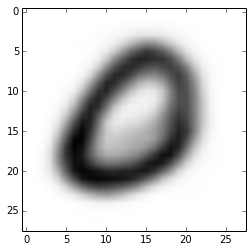

In [10]:
path = os.path.join(os.getcwd(), "..", "param", "mnist", "phi.dat")
pw = pd.read_table(path, sep=" ", header = None)

plt.imshow(pw.values[3].reshape((28,28)), cmap='Greys')

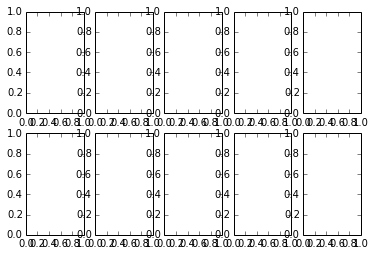

In [18]:
fig, axarr = plt.subplots(2, 5)

for i in xrange(10):
    if i < 5:
        axarr[0][i].imshow(pw.values[i].reshape((28,28)), cmap='Greys')
    else:
        axarr[0][i-].imshow(pw.values[i].reshape((28,28)), cmap='Greys')

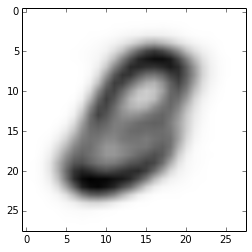

In [31]:
plt.imshow(pw.values[2].reshape((28,28)), cmap='Greys')

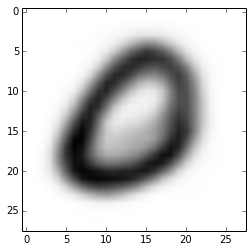

In [32]:
plt.imshow(pw.values[3].reshape((28,28)), cmap='Greys')